In [345]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
from sklearn.cross_validation import train_test_split
%matplotlib inline

# Загружаем датасет

In [346]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

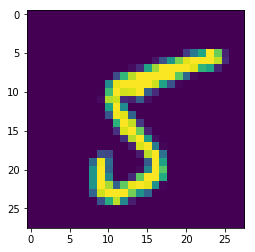

In [347]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][0].reshape(28,28))

# Обучаем модель

In [479]:
X = train['data']
y = train['labels']

y[y==5] = -1 
y[y==6] = 1 

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / (std+(1e-7))

np.random.seed(11)
w0 = np.random.normal(scale=0.001, size = X[0].shape[0])
w=w0

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=10)

logtrain_loss=[]
logtest_loss=[]
loss=0
losst=0

train_acc=[]
logtest_acc=[]
ans_res=0
count=0
ans_restest=0
counttest=0

for iter in tqdm.tqdm_notebook(range(100)):
    
    loss=0
    losst=0
    count=0
    counttest=0
    
    for i in range(x_train.shape[0]):
        grad = - y_train[i] * x_train[i] / \
            ( 1 + np.exp( y_train[i] * np.dot(w.T, x_train[i]) ) ) + 0.001 * w
        w = w - 0.00001 * (grad)
       
    
        ans_res=y_train[i]*np.dot(w.T, x_train[i])
        loss+=np.log(1+np.exp(-ans_res))
        if (ans_res > 0):
            count += 1
        
        if (i<x_test.shape[0]):
            ans_restest=y_test[i]*np.dot(w.T, x_test[i])
            if (ans_restest > 0):
                counttest += 1
            losst+=np.log(1+np.exp(-ans_restest))
            
    logtest_acc.append(counttest/x_test.shape[0])
    train_acc.append(count/x_train.shape[0])   
    logtrain_loss.append(loss)
    logtest_loss.append(losst)

Обучаем на всем множестве

In [490]:
X = train['data']
y = train['labels']

y[y==5] = -1 
y[y==6] = 1 

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / (std+(1e-7))

w=w0

for iter in tqdm.tqdm_notebook(range(100)):
    for i in range(X.shape[0]):
        grad = - y[i] * X[i] / \
            ( 1 + np.exp( y[i] * np.dot(w.T, X[i]) ) ) + 0.0005 * w
        w = w - 0.00001 * (grad)

# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

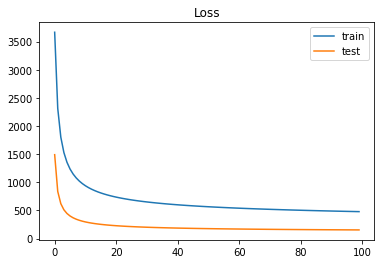

In [492]:

plt.title('Loss')
plt.plot(logtrain_loss, label='train')
plt.plot(logtest_loss, label='test')
plt.legend()

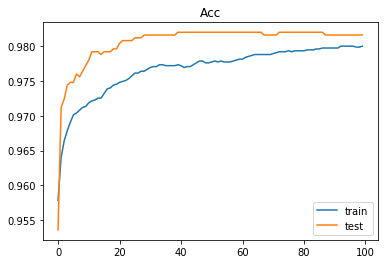

In [493]:
plt.title('Acc')
plt.plot(train_acc, label='train')
plt.plot(logtest_acc, label='test')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [491]:
X = test_no_lables['data']
Y_pred=[]

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / (std+(1e-7))
for i in range(X.shape[0]):
    t = 1/(1+np.exp(-np.dot(w, X[i].T)))
    Y_pred.append(t)

with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(X.shape[0]):
        print(i, Y_pred[i], sep=',', file=fout)

# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу **voropaev@corp.mail.ru**

# Внимание
- Тему письма писать в формате "[МИФИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем family.ipynb